# Création du graphe BTLF



In [1]:
from rdflib import Graph, Namespace, Literal, URIRef
from rdflib import RDF, RDFS, OWL, XSD
import sys
sys.path.append('../../../')
sys.path.append('../../../andre')

import andre.utils as utils
from andre.utils import schema as SCHEMA

# Récupération des documents XML

In [2]:
import xml.etree.ElementTree as ET
filePattern = "../ONIX_Files/202308211746_onix3_M3_{}.xml"

ns = { 'd': "http://ns.editeur.org/onix/3.0/reference" }


items = [] 
for n in range (0,347):
    file = filePattern.format(n)
    data = ET.parse(file)
    root = data.getroot()
    products = root.findall("./d:Product", ns)
    items += products
    

print(len(items), " livres au total")

29599  livres au total


# Extraction des informations à partir des documents XML

In [3]:
import xml.etree.ElementTree as ET

productIdenfifier = {
    "01" : "Proprietary",
    "02" : "ISBN-10",
    "03" : "GTIN-13",
    "06" : "DOI",
    "13" : "LCCN" ,
    "15" : "ISBN-15",
}


productForm = {
    "00" : "Undefined",
    "BA" : "Book",
    "BB" : "Hardback",
    "BC" : "Paperback / softback",
    "BH" : "Board book",
    "BE" : "Spiral bound", 
    "SB" : "Multiple-component retail product, boxed",
    "SA" : "Multiple-component retail product",
    "ED" : "Digital download",
    "BO" : "Fold-out book or chart",
    "BD" : "Loose-leaf",
    "SF" : "Multiple-component retail product, part(s) enclosed",
    "AC" : "CD-Audio",
    "ZZ" : "Other merchandise"
}


primaryContentType = {
    "10" : "Text",   
}


titleElementLevel = {
    "01" : "Product",
    "02" : "Collection level",
    "03" : "Subcollection"   
}

titleDetail = {
    "00" : "Undefined",
    "01" : "Distinctive title (book); Cover title (serial); Title on item (serial content item or reviewed resource)",
    "02" : "ISSN key title of serial",
    "03" : "Title in original language",
    "04" : "Title acronym or initialism",
    "05" : "Abbreviated title",
    "06" : "Title in other language",
    "08" : "Former title", 
    "14" : "Alternative title",
}

contributorRole = {
    "A01" : "By (author)",
    "A02" : "With",
}

languageRole = {
    "01" : "Language of text",
    "02" : "Original language of a translated text",
}

subjectSchema = {
    "01" : "Dewey",
    "10" : "BISAC",
    "23" : "Publisher's own category",
    "93" : "Thema",
    "94" : "Thema place qualifier"   
}

pusblishingRole = {
    "01" : "Publisher",
    "10" : "Publishing group"
}

textType = {
    "03" : "Description",
    "06" : "Review quote",    
    "10" : "Promotional headline",
}


editeursQuebecois = [
    "Alire",
    "Atma",
    "Bayard Canada",
    "Bravo!",
    "Chouette",
    "De la Bagnole",
    "Édimag",
    "Fonfon",
    "Glénat Québec",
    "JCL",
    "La Courte échelle",
    "La Griffe",
    "La Mèche",
    "La Semaine",
    "Le Jour",
    "Les Éditions de l'Hexagone",
    "Les Éditions du Journal",
    "Les Éditions Québec-Livres",
    "Les Presses Libres",
    "Libre Expression",
    "Logiques",
    "Marcel Broquet Éditeur",
    "Marchand de feuilles",
    "Michel Quintin",
    "Monde Différent (Un)",
    "Parfum d'encre",
    "Perro éditeur",
    "Petit homme",
    "Presses Aventure",
    "Publistar",
    "Recto-Verso",
    "Soulières Éditeur",
    "Stanké",
    "Trécarré",
    "Typo",
    "VLB éditeur",
    "Wilson & Lafleur",
    "Z'Ailées",
]

# exclu: 
## PC10 = jeunes adultes: >18ans
## PC08 =  Tranche d'âge spécifique: pas de connaissance de la tranche d'age
## PC12 = public motivé: ne peut pas deduire age
## PC13 = professionel: surement > à 18 ans
## NS06 = Universitaire: > 18ans
## PC11 = adultes

# correspondance age/ niveau scolaires -> voir image
age_ranges = {
    "PC03" : [0, 1, 2, 3],
    "PC04" : [3, 4, 5, 6],
    "PC05" : [6, 8, 9],
    "PC06" : [9, 10, 11, 12],
    "PC07" : [12, 13, 14, 15],
    "PC01" : [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], # Tout Public: > 8 ans car sinon, longueur et format livre incompatible entre ages extrêmes
    "NS03" : [12, 13, 14, 15, 16],
    "NS02" : [6, 7, 8, 9, 10, 11],
    "NS01" : [0, 1, 2, 3, 4, 5], # prescolaire: < 6 ans
    "NS05" : [17, 18] # college = CEGEP
    }

age_ranges_str = {
    "PC03" : ["0", "1", "2", "3"],
    "PC04" : ["3", "4", "5", "6"],
    "PC05" : ["6", "8", "9"],
    "PC06" : ["9", "10", "11", "12"],
    "PC07" : ["12", "13", "14", "15"],
    "PC01" : ["8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18"]

    }

# Correspondance Age/ Niveau Scolaire
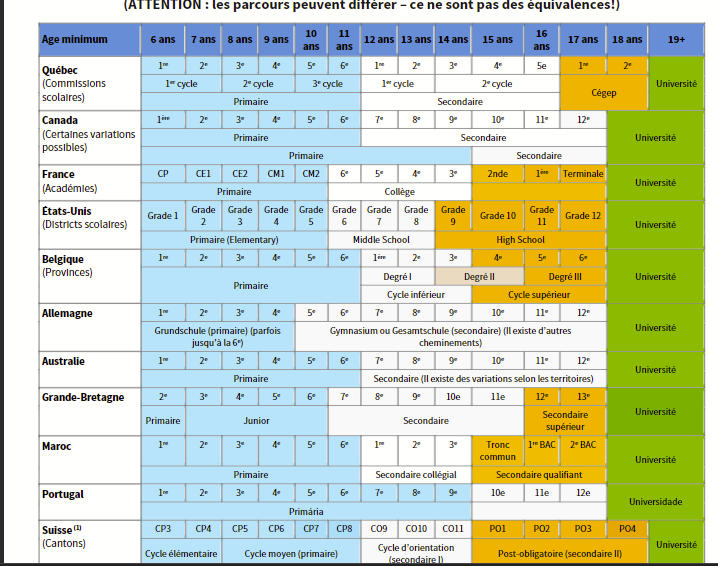

In [4]:
listeInfo = {}

for p in items:
    # info = p.findall("./d:ProductIdentifier/d:ProductIDType", ns)
    # info = p.findall('./d:DescriptiveDetail/d:ProductForm', ns)
    # info = p.findall('./d:DescriptiveDetail/d:ProductFormDetail', ns)
    # info = p.findall('./d:DescriptiveDetail/d:PrimaryContentType', ns)

    # info = p.findall('.//d:TitleType', ns)

    # info = p.findall('.//d:LanguageRole', ns)
    # info = p.findall('.//d:LanguageCode', ns)

    # info = p.findall(".//d:SubjectSchemeIdentifier[.='20']../d:SubjectCode", ns)
    
    # info = p.findall('./d:DescriptiveDetail/d:Audience/d:AudienceCodeType', ns)
    # info = p.findall('.//d:ContentAudience', ns)
    
    # info = p.findall('./d:DescriptiveDetail/d:Collection/d:CollectionType', ns)

    # Iinfo = p.findall(".//d:PublishingDetail/d:Publisher/d:PublishingRole[.='01']../d:PublisherName", ns)     
    # info = p.findall(".//d:PublishingDetail/d:CityOfPublication", ns)
    # info = p.findall(".//d:CollateralDetail/d:TextContent/d:TextType", ns)
    # info = p.findall(".//d:RelatedMaterial/d:RelatedProduct/d:ProductRelationCode", ns)
    
    # info = p.findall("./d:PublishingDetail/d:PublishingDate/d:Date", ns)
 
    # info = p.findall('.//d:ContributorRole', ns)


    info = p.findall('.//d:Audience/d:AudienceCodeValue', ns)

    
    for i in info:
        if (i.text) in listeInfo:
            listeInfo[i.text] += 1
        else:
            listeInfo[i.text] = 1
            
        



In [5]:
listeInfo.keys()

dict_keys(['PC01', 'PC04', 'PC05', 'PC07', 'PC06', 'PC03', 'NS02', 'PC13', 'PC10', 'PC12', 'NS03', 'NS01', 'NS06', 'PC08', 'NS05', 'PC11'])

In [6]:
listeInfo["PC04"]

7187

In [7]:
# Pour tester

# total = 0
# for (e,n) in sorted(listeInfo.items(), key = lambda x: x[1], reverse = True):
#     print(e,n)
#     total += n
    
# print("Total", total)

# Description des données

## Statistiques sur les infos

* ProductIDType: tous les items ont les types de ID suivants: 
    * ISBN-15 (15) 
    * GTIN (03)
    * propriétaire (01)
    
* ProductForm: on trouve les codes suivants:
    * hardback (BB):  13823
    * paperback (BC): 15329
    * book (BA): 193
    * board book (BH): 21
    * spiral bound (BE): 78
    * Multiple-component retail product (SB et SA): 101
    * digital download (ED): 39
    * autres (BD, BO, SF, AC et ZZ): 15
    
* ProductFormDetail: Seulement 7635 livres ont cette information
    * Pocket (B113): 5092
    * With dust jacket (B501): 1229
    * Mass market (rack) paperback (B101): 504
    * Picture book (B221): 241
    * Book-as-toy (B213): 224
    
* PrimaryContentType: on trouve seulement 2 occurrences

* TitleType: 
    * Distinctive title... (01): 53198
    * Title in original language (03): 467
    * Autres (02 et 07): 2
    
* ContributionRole (une quaranteine) :
    * A01 (By (author)): 31203
    * A12 (Illustrated by): 12873
    * B06 (Translated by):  8780
    * A40 (Inked or colored by): 1018
    * A99 (Other primary creator): 598
    * B01 (Edited by): 573
    * A15 (Preface by): 441
    * B05 (Adapted by): 284
    * Autres: 1726
    
* Contributor/SequenceNumber: On note jusqu'à 27 auteurs
    * 1 auteur:  29560
    * 2 auteurs: 18985
    * 3 auteurs: 6095
    * 4 auteurs: 1651
    * 5 auteurs: 557
    * 6 auteurs: 237
    * 7 auteurs: 111
    * 8 auteurs: 52
    * 9 auteurs: 29
    * 10 auteurs: 12
    * 11 auteurs et plus: 34
* Contributor/BiographicalNote: 1161 instances
* LanguageRole: 
    * Language of text (01): 29411
    * Original language of a translated text (02): 8224
* LanguageCode: 
    * Francais: 29149
    * Anglais: 4910
    * Japonais: 1440
    * Autres: 2136
    
* SujbectSchemaIdentifer:
    * Dewey (01): 29592
    * Thema (93): 30220
    * Thema place qualifier (94): 486
    * Thema language qualifier (95): 37
    * Thema time period qualifier (96): 142
    * Thema educational purpose qualifier (97): 72
    * Thema interest age / special interest qualifier (98): 193
    * Thema style qualifier (99): 11
    
* AudienceCodeType: on trouve seulement le code 06 (BTLF)
* CollateralDetail/TextContent/ContentAudience: on trouve seulement le code 00 (unrestricted)


* CollectionType: on trouve seulement le code 10 (Publisher collection)  

* PublishingRole: 
     * Publisher (01): 29660
     * Co-publisher (02): 395
     
* CityOfPublication: 
    * Paris: 17172
    * Montréal: 1468
    * Arles: 1380
    * Bruxelles: 1268
    * Toulouse: 1001
    

* CollateralDetail/TextContent/TextType:
    * Short description/annotation (2): 29235
    * Primary cover copy (5): 23016
    * Biographical note (12): 2400  
    * Description (03):  1469
    * Review quote (06): 374
    * Official recommendation (22): 291
    

* RelatedMaterial/RelatedProduct/ProductRelationCode:
    * Electronic version available as (27):  6023
    * Replaces (03): 1829
    * Replaced by (05): 1196
    * Epublication based on (print product) (13): 41
    * Alternative format (06): 26
    * Autres (01, 23 et 32): 7
    
* AudienceCodeType: seulement le code 06 (BTLF audience code). 
* Les valeurs possibles sont les suivantes:
    * PC04 (3-6 ans) 7187
    * PC06 (9-12 ans) 6211
    * PC05 (6-9 ans) 6147
    * PC01 (Tous publics) 4605
    * PC07 (12-15 ans) 4422
    * PC03 (0-3 ans) 846
    * PC10 (Jeunes adultes) 95
    * NS03 (Secondaire) 43 
    * PC08 (Tranche d'âge spécifique) 15 -> pas de specificité sur age
    * NS02 (Primaire) 14
    * PC12 (Public Motivé) 6
    * PC13 (Professionel) 2
    * NS01 (Préscolaire) 2
    * NS06 (Universitaire) 2
    * NS05 (Collégial) 1
    * PC11 (Adultes seulement) 1
    



# Création du graphe RDF

In [8]:
from rdflib import Graph, Namespace, Literal, URIRef
from rdflib import RDF, RDFS, OWL, XSD


SCHEMA = Namespace("http://schema.org/")
DCTERMS = Namespace("http://purl.org/dc/terms/")
DBO = Namespace("http://dbpedia.org/ontology/")
PBS = Namespace("http://www.example.org/pbs#")



In [9]:
graphe_Auteurs = Graph()
graphe_Auteurs.bind("schema","http://schema.org/", override=True, replace=True)
graphe_Auteurs.bind("pbs","http://www.example.org/pbs#", override=True)
graphe_Auteurs.bind("author","http://schema.org/Person", override=True, replace=True)


In [10]:
graphe_Editeurs = Graph()
graphe_Editeurs.bind("schema","http://schema.org/", override=True, replace=True)
graphe_Editeurs.bind("pbs","http://www.example.org/pbs#", override=True)

In [11]:
graphe_Livres = Graph()
graphe_Livres.bind("schema","http://schema.org/", override=True, replace=True)
graphe_Livres.bind("pbs","http://www.example.org/pbs#", override=True)


## Création du graphe des auteurs


In [12]:
id = 0
auteurs = {}
print(len(items))
for item in items:
    rf = item.find('.//d:RecordReference', ns).text
    # print(rf)
    if rf == "NOT1601606716250":
        print("a")
        editeur = item.findall(".//d:PublishingRole[.='01']../d:PublisherName", ns) 
        if not editeur:
            print('ERREUR',item)   
    
        liste_auteurs = item.findall('.//d:DescriptiveDetail/d:Contributor', ns)
        for a in liste_auteurs: 
            nom = a.find(".//d:PersonNameInverted", ns)
            print(nom.text)


29599
a
Lepage, Françoise


In [13]:
id = 0
auteurs = {} # clé = Nom, Prénom
for item in items:
    editeur = item.findall(".//d:PublishingRole[.='01']../d:PublisherName", ns) 
    if not editeur:
        print('ERREUR',item)   

    liste_auteurs = item.findall('.//d:DescriptiveDetail/d:Contributor', ns)
    for a in liste_auteurs: 
        nom = a.find(".//d:PersonNameInverted", ns)
        if nom == None:
            continue
        if nom.text not in auteurs:
            id += 1
            auteurs[nom.text] = SCHEMA['author' + str(id)]
            graphe_Auteurs.add((SCHEMA['author' + str(id)],RDF.type, SCHEMA['Person']))
            nom_prenom = nom.text.rsplit(",")
            if len(nom_prenom) == 2:
                nom_famille = nom_prenom[0].strip()
                prenom = nom_prenom[1].strip()
                graphe_Auteurs.add((SCHEMA['author' + str(id)],SCHEMA.givenName,Literal(prenom)))
                graphe_Auteurs.add((SCHEMA['author' + str(id)],SCHEMA.familyName,Literal(nom_famille)))
            elif len(nom_prenom) == 1: # pseudonyme ex: Barasui ou nom/prenom pas clairement défini ex: Vieira da Silva
                nom_famille = nom_prenom[0].strip()
                graphe_Auteurs.add((SCHEMA['author' + str(id)],SCHEMA.familyName,Literal(nom_famille)))
                # print(nom.text)
            else:
                print(nom.text)

                
            bio = a.findall('./d:BiographicalNote', ns)
            if bio:
                graphe_Auteurs.add((SCHEMA['author' + str(id)],SCHEMA.description	,Literal(bio[0].text)))

            # print(nom.text, auteurs[nom])

In [14]:
print(len(auteurs),'auteurs')
print(len(graphe_Auteurs), 'triplets')

18147 auteurs
54045 triplets


In [15]:
# # for (s,p,o) in graphe_Auteurs.triples((BTLF['auteur/335'],None,None)):
#     print(s,p,o)

## Création du graphe des éditeurs

In [16]:
def find_preprocessed_name_by_uri(target_uri):
    for preprocessed_name in publishers_bnf_constellations_dict.keys():
        uri = publishers_bnf_constellations_dict[preprocessed_name].uri
        # print(uri)
        if uri == target_uri:
            return preprocessed_name
    return "not found"

In [17]:
publishers_bnf_constellations = Graph()
publishers_bnf_constellations.bind("schema","http://schema.org/", override=True, replace=True)
publishers_bnf_constellations.parse("../../publishers.ttl")
len(list(publishers_bnf_constellations))

publishers_bnf_constellations_dict = {}
doublons = []
for publisher in publishers_bnf_constellations.subjects(RDF.type, SCHEMA.Publisher):
    raw_name = str(publishers_bnf_constellations.value(publisher, SCHEMA.name))
    preprocessed_name = utils.preprocess_publisher_name(raw_name)

    
    if preprocessed_name in publishers_bnf_constellations_dict.keys():
        # print("doublons", name)
        doublons.append(preprocessed_name)
    else: # pas de doublons dans les matchs -> a revoir plus tard
        publishers_bnf_constellations_dict[preprocessed_name] = utils.Publisher(source="bnf_constellations", 
                                                                        uri=publisher, 
                                                                        raw_name=raw_name, 
                                                                        preprocessed_name=preprocessed_name)

print(len(doublons))
print(len(publishers_bnf_constellations))
len(publishers_bnf_constellations_dict)

58
4690


2237

In [19]:
id = 0


# editeurs = {}
btlf_publishers_dict = {}
doublons_btlf = []
exact_match_counter = 0
manual_match_counter = 0
no_match_counter = 0

# manual matches: key = btlf name -> value =  bnf_constellation_uri
# because bnf_constellation_uri very close to their name
manual_matches = {"Gulf Stream (Editions du)": "Gulf_Stream", 
                  "Magnard-Vuibert": "Magnard",
                  "Musée du Louvre": "MuseduLouvred",
                 "Soleil productions": "Soleilproduction",
                 "Editions Ouest-France-Edilarge": "OuestFrance",
                 "Plume de carotte": "Plumecarotte",
                 "Editions Dadoclem": "Dadoclemd",
                 "Jean-Claude Gawsewitch éditeur": "JCGawsewitch",
                 "Editions de L'Archipel": "LArchipel",
                 "Odile Jacob": "OJacob",
                 "Editions du Centre Pompidou": "Centre Pompidou",
                 "Musées de la ville de Strasbourg": "lesMusesdelaVilledeStrasbourg"
                 }

# for root in items:
#     editeur = root.findall(".//d:PublishingRole[.='01']../d:PublisherName", ns) 
#     if not editeur:
#         print('ERREUR',item)
#     for e in editeur:
#         btlf_publishers_dict[e.text] = ""
        
    
for root in items:

    raw_names = root.findall(".//d:PublishingRole[.='01']../d:PublisherName", ns) 
    if not raw_name:
        print('ERREUR', root)
    for raw_name in raw_names:

        raw_name = raw_name.text
        preprocessed_name = utils.preprocess_publisher_name(raw_name)
    
        if preprocessed_name in btlf_publishers_dict.keys():
            doublons_btlf.append(preprocessed_name)
        else:
            btlf_publishers_dict[preprocessed_name] = raw_name
            # if "paquet" in preprocessed_name:
            #     print("\""+ raw_name+ "\"")
            if preprocessed_name in publishers_bnf_constellations_dict.keys(): # don't change graph
                exact_match_counter += 1 
            elif raw_name in manual_matches.keys(): # don't change graph
                # but: avoir uri du truc matché
                manual_match_counter += 1
                matched_uri = manual_matches[raw_name]
                print(raw_name)
                print(matched_uri)
                print(SCHEMA[matched_uri])
                publishers_bnf_constellations.add((SCHEMA[matched_uri], SCHEMA.name, Literal(raw_name, datatype=utils.xsd.string))) # ajouter le nom pour tester les matches et avertir de 2 noms possible pour maison edition
                print(find_preprocessed_name_by_uri(SCHEMA[matched_uri]))
            else:
                no_match_counter += 1
                uri = raw_name.replace(' ', '_').replace("'", "").replace("&", "_").replace("/", "_").replace(".", "")
                print(uri)
                uri = URIRef(f'{SCHEMA}{uri}')
                publishers_bnf_constellations.add((uri, RDF.type, SCHEMA.Publisher))
                publishers_bnf_constellations.add((uri, SCHEMA.name, Literal(raw_name, datatype=utils.xsd.string)))
                preprocessed_name = utils.preprocess_publisher_name(raw_name)
                publishers_bnf_constellations_dict[preprocessed_name] = utils.Publisher(source="btlf", 
                                                                        uri=uri, 
                                                                        raw_name=raw_name, 
                                                                        preprocessed_name=preprocessed_name)

        # editeurs[n] = SCHEMA['publisher' + str(id)]
        # graphe_Editeurs.add((SCHEMA['publisher' + str(id)], RDF.type, SCHEMA['Publisher']))   
        # graphe_Editeurs.add((SCHEMA['publisher' + str(id)], SCHEMA.name, Literal(n))) 
        # id += 1
    
# print(editeurs)
print("direct", exact_match_counter)
print("manual", manual_match_counter)
print("no match", no_match_counter)
assert(manual_match_counter == len(manual_matches))

http://schema.org/Centre Pompidou does not look like a valid URI, trying to serialize this will break.
http://schema.org/Centre Pompidou does not look like a valid URI, trying to serialize this will break.
http://schema.org/Centre Pompidou does not look like a valid URI, trying to serialize this will break.


Réseau_Canopé
Magnard-Vuibert
Magnard
http://schema.org/Magnard
magnard
Soleil productions
Soleilproduction
http://schema.org/Soleilproduction
soleilproduction
Gulf Stream (Editions du)
Gulf_Stream
http://schema.org/Gulf_Stream
gulfstream
Univers_Poche
AC_Media
Media-Participations_Paris
SEJER
Société_des_éditions_Grasset_et_Fasquelle
Editions_du_Rouergue
Les_éditions_A_propos
Humensis
Edi8
Dargaud-Lombard_SA
Direction_information_légale_et_administrative
TF1_Entreprises
Place_des_éditeurs
Editions_Jean-Paul_Gisserot
Minedition_France
Un,_deux,_quatre_édition
Editions_du_Toucan
Emile_et_Compagnie
Vincze_(Eva)
Beurre_salé
Edizioni_Corraini
Atelier_EXB
Editions_Picquier_(Philippe)
LAtelier
Musée du Louvre
MuseduLouvred
http://schema.org/MuseduLouvred
museedulouvreed
Soréda
Hoche_communication
Dexia_Editions
Les_Editions_du_Quotidien
Alseg_edition_presse_et_multimedia
Epsilon_éditions
Cyr_éditions
Grain_de_sable
Lire_en_Calédonie
Valbert
Viz_Média_Europe
Afrobul
Editions_Lattès_(Jean-Clau

In [1]:
fichier = open("../Graphes/grapheEditeurs_BTLF_BNF_Constellations.ttl","wb")
publishers_bnf_constellations.serialize(fichier) 
fichier.close()

NameError: name 'publishers_bnf_constellations' is not defined

In [ ]:
print(len(graphe_Editeurs))

0


## Création du graphe des livres

In [ ]:
exact_match_counter = 0
manual_match_counter = 0
no_match_counter = 0


livres = []
for root in items:
    rf = root.find('.//d:RecordReference', ns)
    graphe_Livres.add((SCHEMA[rf.text], RDF.type, SCHEMA['Book']))
    graphe_Livres.add((SCHEMA[rf.text], PBS.infoSource, PBS.BTLF))

    editeursLivre = root.findall(".//d:PublishingRole[.='01']../d:PublisherName", ns)     

    for raw_name in editeursLivre:
        raw_name = raw_name.text
        preprocessed_name = preprocess_name(raw_name)
        # print(preprocessed_name)
        if preprocessed_name in publishers_bnf_constellations_dict.keys():
            exact_match_counter += 1
            publisher_uri = publishers_bnf_constellations_dict[preprocessed_name].uri
            graphe_Livres.add((SCHEMA[rf.text], SCHEMA.publisher, publisher_uri))
        elif raw_name in manual_matches.keys():
            manual_match_counter += 1
            # print(raw_name)
            matched_uri = manual_matches[raw_name]
            matching_preprocessed_name = find_preprocessed_name_by_uri(SCHEMA[matched_uri])
            publisher_uri = publishers_bnf_constellations_dict[matching_preprocessed_name].uri
            graphe_Livres.add((SCHEMA[rf.text], SCHEMA.publisher, publisher_uri))
        else:
            no_match_counter += 1
            # print("# si pas trouvé avec le preprocessed name, forcement dans le dict")
        
    liste_auteurs = root.findall('.//d:Contributor', ns)
    if len(liste_auteurs) > 0:
        for a in liste_auteurs: 
            nom = a.find(".//d:ContributorRole[.='A01']../d:PersonNameInverted", ns)
            if nom != None:
                graphe_Livres.add((SCHEMA[rf.text], SCHEMA.author, auteurs[nom.text]))

        for a in liste_auteurs: 
            nom = a.find(".//d:ContributorRole[.='A12']../d:PersonNameInverted", ns)
            if nom != None:
                graphe_Livres.add((SCHEMA[rf.text], SCHEMA.illustrator, auteurs[nom.text]))

    isbn = root.findall(".//d:ProductIdentifier/d:ProductIDType[.='15']../d:IDValue", ns)
    if isbn:
        graphe_Livres.add((SCHEMA[rf.text], SCHEMA.isbn, Literal(isbn[0].text)))

    
       
    language = root.find('.//d:Language/d:LanguageCode', ns)
    if language != None:
        graphe_Livres.add((SCHEMA[rf.text], SCHEMA.inLanguage, Literal(language.text)))

    

    liste_thema_main_subjet = root.findall(".//d:Subject/d:MainSubject/../d:SubjectSchemeIdentifier[.='93']../d:SubjectCode", ns)
    for t in liste_thema_main_subjet:
        graphe_Livres.add((SCHEMA[rf.text], PBS.mainSubjectThema, Literal(t.text)))

                  
    liste_thema_subject = root.findall(".//d:Subject/d:SubjectSchemeIdentifier[.='93']../d:SubjectCode", ns)
    for t in liste_thema_subject:
        graphe_Livres.add((SCHEMA[rf.text], PBS.subjectThema, Literal(t.text)))
        
        
    # titre = root.findall('.//d:TitleStatement', ns)
    # titre = root.find(".//d:DescriptiveDetail/d:TitleDetail/d:TitleType[.='01']../d:TitleElement/d:TitleElementLevel[.='01']../d:TitleWithoutPrefix", ns)
    titre = root.find(".//d:DescriptiveDetail/d:TitleDetail/d:TitleType[.='01']../d:TitleElement/d:TitleElementLevel[.='01']../../d:TitleStatement", ns)

    if titre != None:
        graphe_Livres.add((SCHEMA[rf.text], SCHEMA.name, Literal(titre.text)))        
        
        
    description = root.findall(".//d:TextContent/d:TextType[.='03']../d:Text", ns)
    if description:
        graphe_Livres.add((SCHEMA[rf.text], SCHEMA.abstract, Literal(description[0].text)))
       
        
    reviewQuote = root.findall(".//d:TextContent/d:TextType[.='06']../d:Text", ns)
    if reviewQuote:
        graphe_Livres.add((SCHEMA[rf.text], SCHEMA.review, Literal(reviewQuote[0].text)))


    date = root.find(".//d:PublishingDate/d:Date", ns)
    if date != None:
        graphe_Livres.add((SCHEMA[rf.text], SCHEMA.datePublished, Literal(date.text)))
        
    audience = root.find(".//d:Audience/d:AudienceCodeValue", ns)
    if audience != None and audience.text in age_ranges:
        age_range = age_ranges[audience.text]
        for age in age_range:     
            graphe_Livres.add((SCHEMA[rf.text], PBS.age, Literal(age)))

print("direct", exact_match_counter)
print("manual", manual_match_counter)
print("no match", no_match_counter)

direct 29383
manual 277
no match 0


## Sauvegarde du graphe

In [ ]:
fichier = open("../Graphes/grapheAuteurs_BTLF.ttl","wb")
graphe_Auteurs.serialize(fichier) 
fichier.close()

In [ ]:
fichier = open("../Graphes/grapheLivres_BTLF_EditeursConsolides.ttl","wb")
graphe_Livres.serialize(fichier) 
fichier.close()